In [ ]:
pip install imbalanced-learn

In [ ]:
pip install psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 7.6 MB/s eta 0:00:00


In [ ]:
pip install scikit-learn

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Carregar o dataset

url = "https://raw.githubusercontent.com/ISQRS00/datathon/main/datasets/base_antiga_tratada_202502102011.csv"
df = pd.read_csv(url)

# Selecionar apenas as colunas relevantes


# Exibir as primeiras linhas do dataset
print(df.head())

      nome nam_pedra  num_fase _des_turma  num_inde  num_iaa  num_ieg  \
0  ALUNO-1  Ametista       2.0          H      7.88     8.50      8.7   
1  ALUNO-3  Ametista       3.0          H      7.85     7.91      8.9   
2  ALUNO-4   Quartzo       1.0          D      5.07     8.00      4.1   
3  ALUNO-5  Ametista       2.0          M      8.07     7.50      8.0   
4  ALUNO-8  Ametista       4.0          L      8.38     8.33      9.9   

   num_ips  num_ipv  num_ian  num_ida  num_ipp   ano dat_reference  \
0     7.50     7.75     10.0     7.00     5.93  2020    2020-01-01   
1     7.50     8.11     10.0     5.50     8.12  2020    2020-01-01   
2     6.87     7.75      5.0     0.00     7.18  2020    2020-01-01   
3     7.50     8.16     10.0     7.50     8.43  2020    2020-01-01   
4     4.37     8.94     10.0     7.33     8.74  2020    2020-01-01   

  flg_ponto_virada  
0              Não  
1              Não  
2              Não  
3              Não  
4              Sim  


<Axes: >

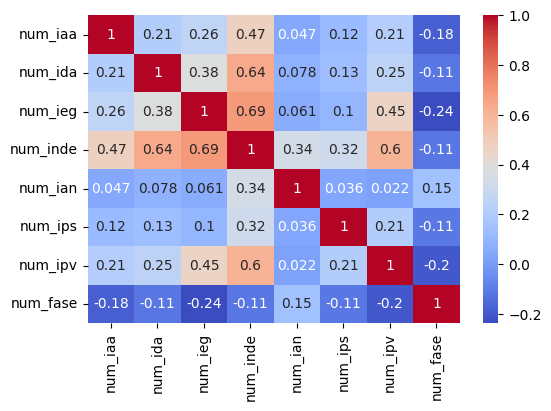

In [3]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['num_iaa','num_ida','num_ieg','num_inde','num_ian','num_ips','num_ipv','num_fase']].corr(method='pearson'), annot=True, cmap='coolwarm')


In [7]:
import joblib
# 📌  Aplicar Label Encoding às variáveis categóricas
label_encoder_flg = LabelEncoder()
df['flg_ponto_virada'] = label_encoder_flg.fit_transform(df['flg_ponto_virada'])

label_encoder_turma = LabelEncoder()
df['_des_turma'] = label_encoder_turma.fit_transform(df['_des_turma'])

# 📌  Selecionar as colunas usadas no modelo
colunas_numericas = ['num_inde', 'num_iaa', 'num_ian', 'num_ieg', 'num_ips', 'num_ida', 'num_ipv']
X = df[['num_ian', 'num_ida', 'num_ieg', '_des_turma', 'num_fase']]
y = df['flg_ponto_virada']

# 📌  Aplicar oversampling antes da normalização
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# 📌  Normalizar os dados
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# 📌  Dividir os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, random_state=42)

# 📌  Treinar os Modelos e Comparar
modelos = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000)
}

melhor_modelo = None
maior_acuracia = 0

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, y_pred)

    print(f"🔍 {nome} - Acurácia: {acuracia:.4f}")

    if acuracia > maior_acuracia:
        melhor_modelo = modelo
        maior_acuracia = acuracia

# 📌 8️⃣ Salvar apenas o melhor modelo
print(f"\n🏆 Melhor modelo: {type(melhor_modelo).__name__} com {maior_acuracia:.4f} de acurácia")
joblib.dump(melhor_modelo, "modelo_2.pkl")
joblib.dump(scaler, "scaler_2.pkl")
joblib.dump(label_encoder_flg, "label_encoder_flg.pkl")
joblib.dump(label_encoder_turma, "label_encoder_turma.pkl")
joblib.dump(maior_acuracia, "acuracia_2.pkl")


🔍 RandomForest - Acurácia: 0.9515
🔍 GradientBoosting - Acurácia: 0.8163
🔍 LogisticRegression - Acurácia: 0.7628

🏆 Melhor modelo: RandomForestClassifier com 0.9515 de acurácia


['acuracia_2.pkl']

In [ ]:
print(ponto_virada)

{0: 'Não', 1: 'Sim'}
